In [8]:
%pip install numpy
%pip install pandas
%pip install matplotlib

%pip install seaborn
%pip install scipy
%pip install fitter


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 18.8 MB/s eta 0:00:0000:0100:01
  Installing build depen

# Introducción 

En este cuademo vamos a analizar los datos de salud mental del data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from fitter import Fitter, get_common_distributions, get_distributions

# Leer el archivo CSV
data = pd.read_csv('portugal_housing.csv')
# https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024

C:\Users\pablo\AppData\Local\Temp\ipykernel_2272\4125183357.py:9: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


# Descripción del dataset



This [dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024) contains the more than 100k real asking prices for real estate properties listed on Portuguese real estate websites. The data was legally and ethically scraped from several online platforms, ensuring compliance with the platforms' terms and conditions.

The dataset includes detailed information about each property listing, such as:

- **Price**: The asking price of the property in Euros.
- **District, City, Town**: The geographical location of the property, allowing for regional analysis.
- **Type**: The type of property (e.g., Apartment, House, Garage, Land).
- **EnergyCertificate**: The energy efficiency rating of the property, according to Portuguese energy certification standards.
- **Area Measurements**: Several columns related to the size and area of the property, including:
- **GrossPrivateArea**: The private gross area of the property.
- **UsableArea**: The area that can be used for living.
- **LivingArea**: The actual livable space inside the property.
- **LotSize**: The size of the land associated with the property.
- **BuiltArea**: The total constructed area of the property.
- **Rooms, Bedrooms, Bathrooms, WCs**: Detailed breakdowns of the number of rooms, bedrooms, bathrooms, and water closets in the property.
- **Floor**: The floor on which the property is located.
- **Parking, Garage**: Information on parking availability and the presence of a garage.
- **Additional Features**: Whether the property includes amenities like elevators or electric car charging stations.
- **ConstructionYear**: The year the property was built.
- **PublishDate**: The date when the listing was published.

The dataset is suitable for a variety of analyses, including:

Price trends: Understanding the relationship between location, property features, and asking prices.
Energy efficiency: Investigating how energy certification impacts property values.
Geographical analysis: Exploring regional differences in real estate pricing across Portugal.
This dataset offers a comprehensive snapshot of the Portuguese real estate market, enabling users to gain insights into current pricing, property types, and location-based factors influencing the market.

# Análisis de los datos

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114379 entries, 0 to 114622
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 114379 non-null  float64
 1   District              114379 non-null  object 
 2   City                  114379 non-null  object 
 3   Town                  114377 non-null  object 
 4   Type                  114363 non-null  object 
 5   EnergyCertificate     114365 non-null  object 
 6   Floor                 27846 non-null   object 
 7   Lift                  68075 non-null   object 
 8   Parking               114185 non-null  float64
 9   HasParking            68075 non-null   object 
 10  ConstructionYear      73429 non-null   float64
 11  TotalArea             107932 non-null  float64
 12  GrossArea             27617 non-null   float64
 13  PublishDate           15056 non-null   object 
 14  Garage                46272 non-null   object 
 15  Eleva

In [3]:
data["Floor"]

0         2nd Floor
1         1st Floor
2         3rd Floor
3         4th Floor
4               NaN
            ...    
114618          NaN
114619          NaN
114620          NaN
114621          NaN
114622          NaN
Name: Floor, Length: 114623, dtype: object

# Descriptiva univariante y bivariante 

## Descriptiva univariante 

In [88]:
data.describe()

,Price,Parking,ConstructionYear,TotalArea,GrossArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.143790e+05,114185.000000,73429.000000,1.079320e+05,2.761700e+04,65104.000000,30610.000000,41424.000000,8.714800e+04,2.888600e+04,1.836600e+04,109026.000000
mean,3.666081e+05,0.583868,1988.768103,6.052723e+05,2.791684e+03,3.106629,2.674355,0.405731,1.522202e+03,7.342400e+04,3.686693e+03,1.501633
std,4.128282e+06,0.884670,26.742694,1.870069e+08,1.154108e+05,11.070631,1.905010,1.023325,3.759342e+04,6.096242e+06,1.405066e+05,1.706682
min,1.000000e+02,0.000000,1900.000000,-7.196067e+06,-7.000000e+00,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,7.800000e+04,0.000000,1972.000000,9.500000e+01,1.000000e+02,2.000000,2.000000,0.000000,8.000000e+01,2.960000e+02,1.072950e+02,0.000000
50%,2.000000e+05,0.000000,1994.000000,1.770000e+02,1.640000e+02,3.000000,3.000000,0.000000,1.210000e+02,7.960000e+02,1.780000e+02,1.000000
75%,3.900000e+05,1.000000,2008.000000,6.212500e+02,2.940000e+02,4.000000,3.000000,0.000000,2.150000e+02,3.299750e+03,3.220600e+02,2.000000
max,1.380000e+09,3.000000,2024.000000,6.142007e+10,1.275000e+07,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


## Descriptiva bivariante

### Análisis de variables 

Queremos analizar como se comporta el precio, ya que es la variable a estudiar. Presentamos: 
- Un análisis de la cantidad de piso y el promedio según distintas variables categóricas: Distrito, Ciudad y tipo

In [ ]:
data.groupby("District").agg(
    Recuento=("District", "size"),  # Recuento de registros
    MediaPrecio=("Price", "mean")  # Media de la columna Price
).sort_values("MediaPrecio", ascending= False)


,Recuento,MediaPrecio
District,,
Lisboa,25719,580415.555389
Z - Fora de Portugal,42,531666.666667
Faro,7716,514447.531922
Setúbal,9575,428913.702821
Porto,17994,345145.342422
Beja,1119,328430.174304
Ilha de São Miguel,45,325271.111111
Évora,2105,319185.922967
Ilha Terceira,33,265575.757576


In [61]:
data.groupby("City").agg(
    Recuento=("District", "size"),  # Recuento de registros
    MediaPrecio=("Price", "mean")  # Media de la columna Price
).sort_values("MediaPrecio", ascending= False)

,Recuento,MediaPrecio
City,,
Cascais,2770,1.141327e+06
Grândola,376,9.944822e+05
Lagos,357,9.066113e+05
Lagoa (Algarve),309,7.823294e+05
Lisboa,6945,7.610543e+05
...,...,...
Carrazeda de Ansiães,42,5.331667e+04
Barrancos,5,4.570000e+04
Penamacor,503,3.974562e+04


In [62]:
data.groupby("Town").agg(
    Recuento=("District", "size"),  # Recuento de registros
    MediaPrecio=("Price", "mean")  # Media de la columna Price
).sort_values("MediaPrecio", ascending= False)

,Recuento,MediaPrecio
Town,,
Modivas,5,3.239400e+06
Tamel (Santa Leocádia) e Vilar do Monte,8,2.433938e+06
Carregueiros,18,2.431694e+06
Bensafrim e Barão de São João,40,2.384800e+06
Salvada e Quintos,9,2.369000e+06
...,...,...
Castanheira,2,7.500000e+03
Unhais-o-Velho,10,7.120000e+03
"Pousafoles do Bispo, Pena Lobo e Lomba",3,6.500000e+03


In [66]:
data.groupby("Type").agg(
    Recuento=("District", "size"),  # Recuento de registros
    MediaPrecio=("Price", "mean")  # Media de la columna Price
).sort_values("MediaPrecio", ascending= False)

,Recuento,MediaPrecio
Type,,
Mansion,30,3.224821e+06
Estate,56,2.915693e+06
Hotel,134,2.874964e+06
Manor,6,1.819167e+06
Investment,224,9.637846e+05
Industrial,383,9.172007e+05
Building,2179,8.353386e+05
Duplex,330,7.808050e+05
Farm,3547,5.883479e+05


Eliminamos el regisrto que tiene un valor de 1.38*10^9. Además, tiene 180 metros cuadrados, puede ser un error al introducir los datos.

In [31]:
data = data.drop(index=58801)

In [90]:
data.sort_values(by="Price", ascending= False).head(200) 

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
58801,1.380000e+09,Faro,Faro,Faro (Sé e São Pedro),House,NC,Ground Floor,False,1.0,True,...,NaN,NaN,4.0,NaN,NaN,NaN,180.0,NaN,NaN,3.0
82054,3.600000e+07,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,NaN,1.0,NaN,...,True,True,NaN,NaN,NaN,NaN,6382.0,47054.0,NaN,NaN
64294,3.600000e+07,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,True,3.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,6382.0,NaN,NaN,NaN
64229,2.200000e+07,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,True,3.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1828.0,NaN,NaN,NaN
82055,2.200000e+07,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,NaN,1.0,NaN,...,True,True,NaN,NaN,NaN,NaN,1828.0,21300.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92467,5.950000e+06,Lisboa,Lisboa,Belém,House,B-,NaN,NaN,0.0,NaN,...,False,False,13.0,8.0,2.0,NaN,726.0,709.0,NaN,8.0
13370,5.900000e+06,Beja,Odemira,Vila Nova de Milfontes,Land,NC,NaN,False,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,687.0,NaN,NaN,0.0
36160,5.900000e+06,Lisboa,Lisboa,Santa Maria Maior,Duplex,B-,Duplex,True,3.0,True,...,NaN,NaN,6.0,NaN,NaN,NaN,431.0,NaN,NaN,6.0
114219,5.900000e+06,Vila Real,Sabrosa,"Provesende, Gouvães do Douro e São Cristóvão d...",Farm,NC,NaN,NaN,0.0,NaN,...,True,False,7.0,6.0,1.0,New,246652.0,246652.0,246652.21,7.0


/var/folders/jr/_dyjstd10fx0jjbz81clpyrh0000gn/T/ipykernel_2738/3549430980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Type", y="Price", palette="Set2")


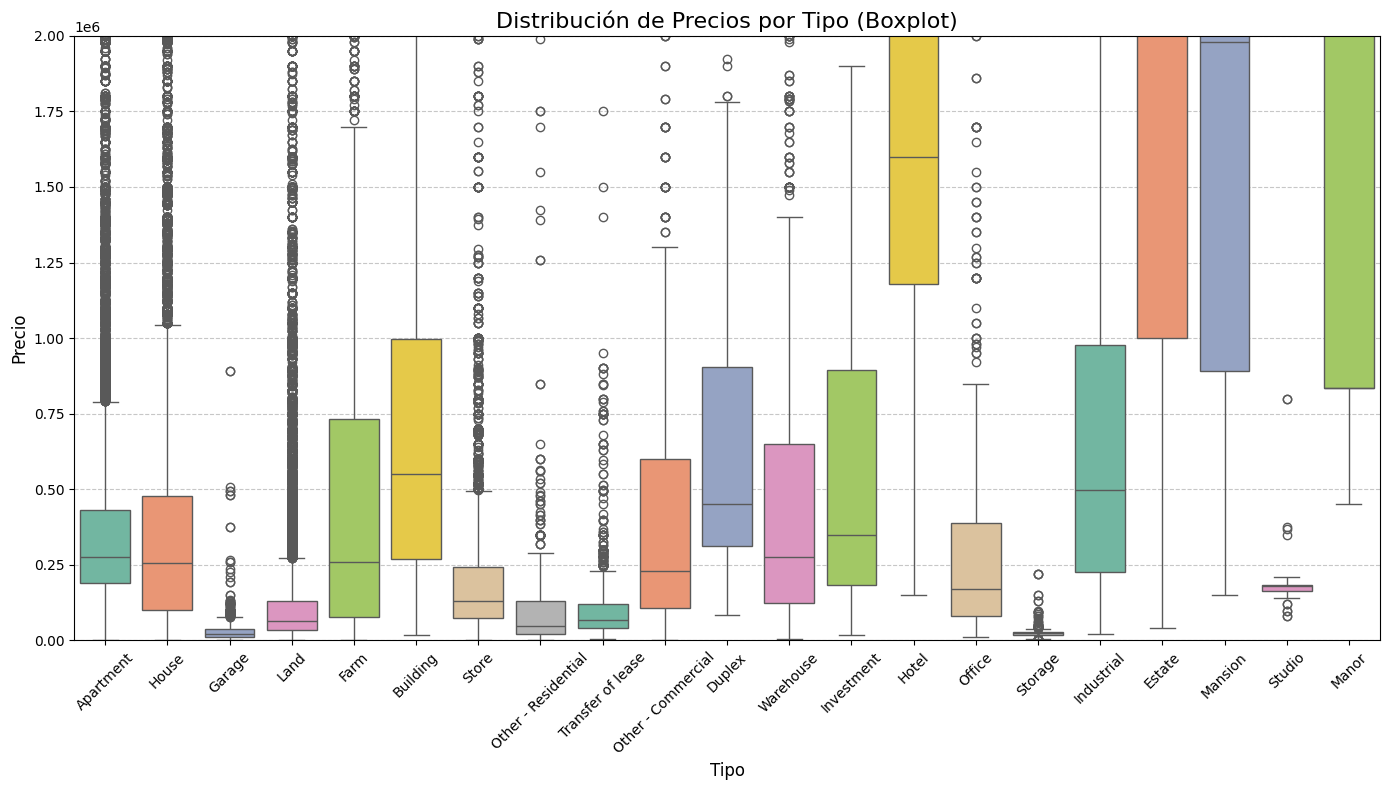

In [ ]:
# Crear el diagrama de caja (boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x="Type", y="Price", palette="Set2")

# Personalizar el gráfico
plt.title("Distribución de Precios por Tipo (Boxplot)", fontsize=16)
plt.xlabel("Tipo", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas si hay muchas categorías
plt.ylim(0, 2000000)  # Establecer el límite superior en 2,000,000

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como se puede apreciar en los datos anteriores vamos a centrarnos solo en los pisos de un coste interior 1.102.920€ 
![cotizacion.png](attachment:cotizacion.png)


In [5]:
data_reduced = data[data["Price"] < 1102920]

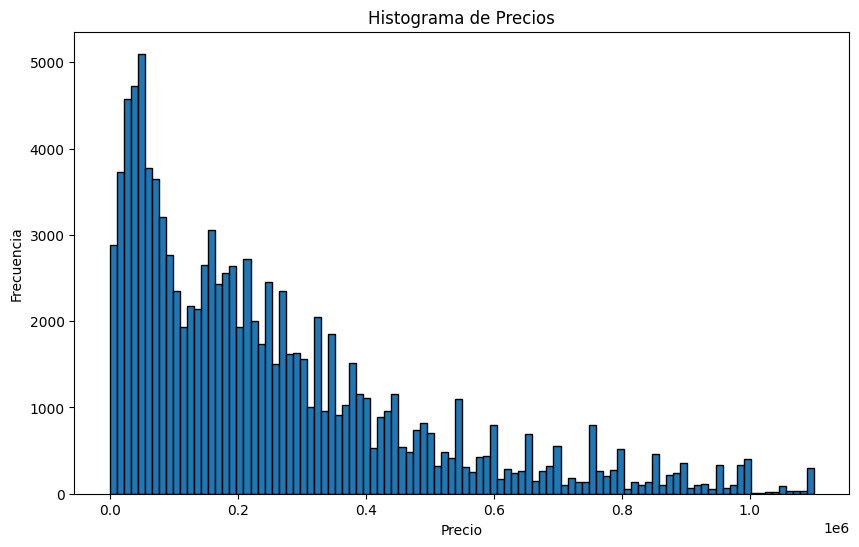

In [102]:
plt.figure(figsize=(10, 6))
plt.hist(data_reduced['Price'], bins = 100 , edgecolor='black')  # Ajusta el número de bins según lo que necesites
#plt.xlim((0,1100000))
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

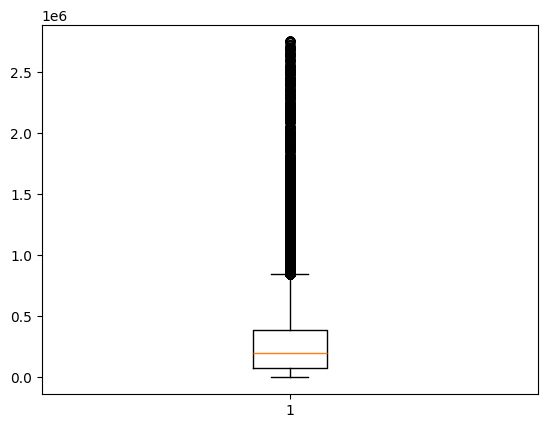

In [ ]:
limite_superior = data["Price"].quantile(0.99)

# Filtrar el dataset para excluir valores mayores al límite superior
df_filtrado = data[data["Price"] <= limite_superior]

plt.boxplot(df_filtrado["Price"])
plt.show()

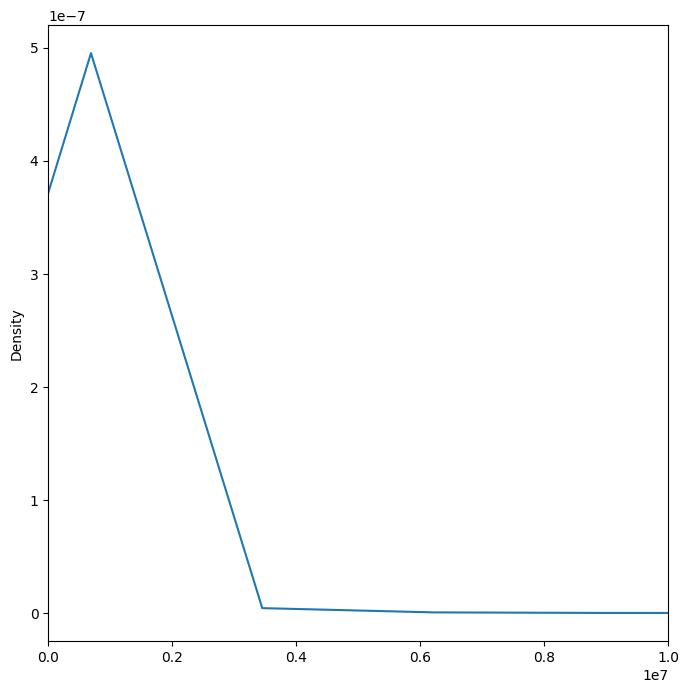

In [ ]:
data['Price'].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,10000000));

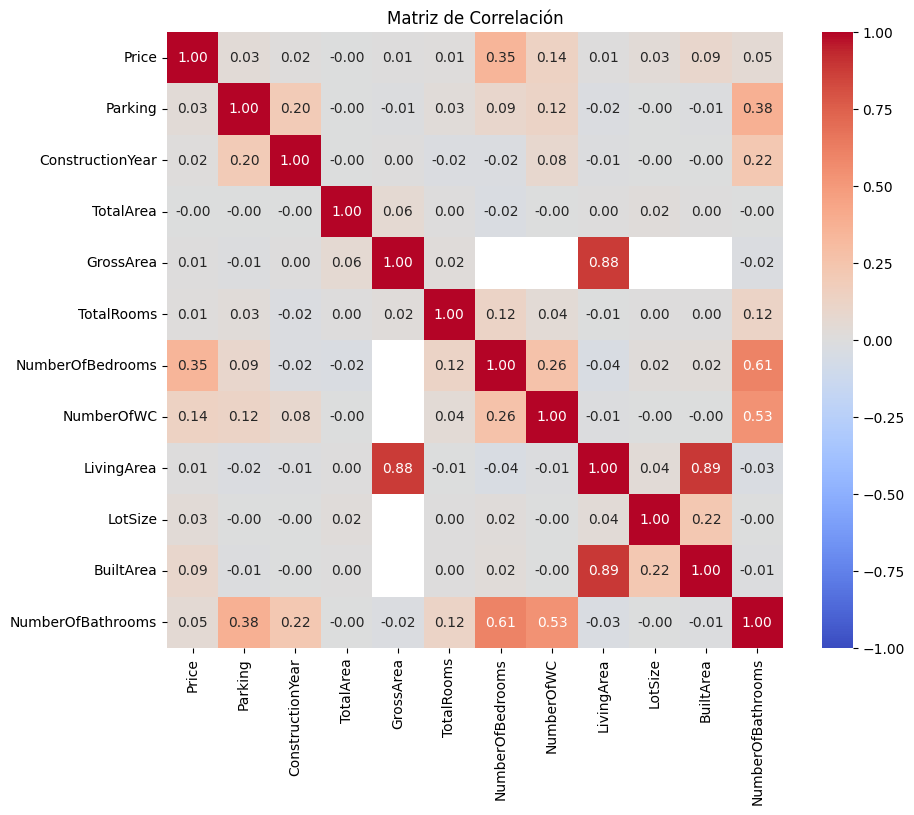

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr(method='pearson')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


In [ ]:
scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()

plt.show()


# Estudio de la normalidad de los datos
- Hitograma
- Simetría (media/mediana/skewness)
- Diagrama de cajas
- Q-Q plot
- Test de normalidad

## Histograma del precio

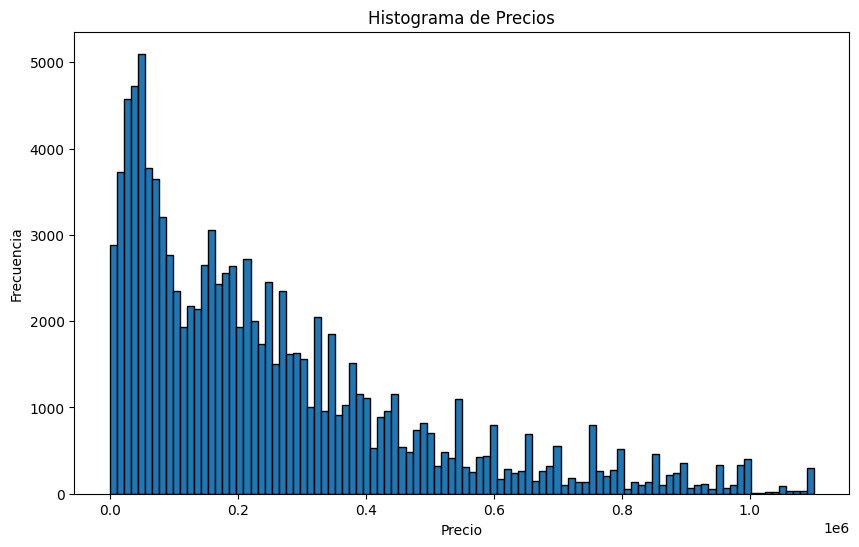

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data_reduced['Price'], bins = 100 , edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [6]:
from fitter import Fitter, get_distributions
data = data[data["Price"].notnull()]

fitter = Fitter(
    data["Price"],
    distributions=get_distributions()  # Ajustar a las distribuciones más comunes
)
fitter.fit()
fitter.summary()

KeyboardInterrupt: 

# Estimación puntual y por intervalos 

# ANOVA

/var/folders/jr/_dyjstd10fx0jjbz81clpyrh0000gn/T/ipykernel_2738/380223857.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1000000)  # Establecer el límite superior en 2,000,000


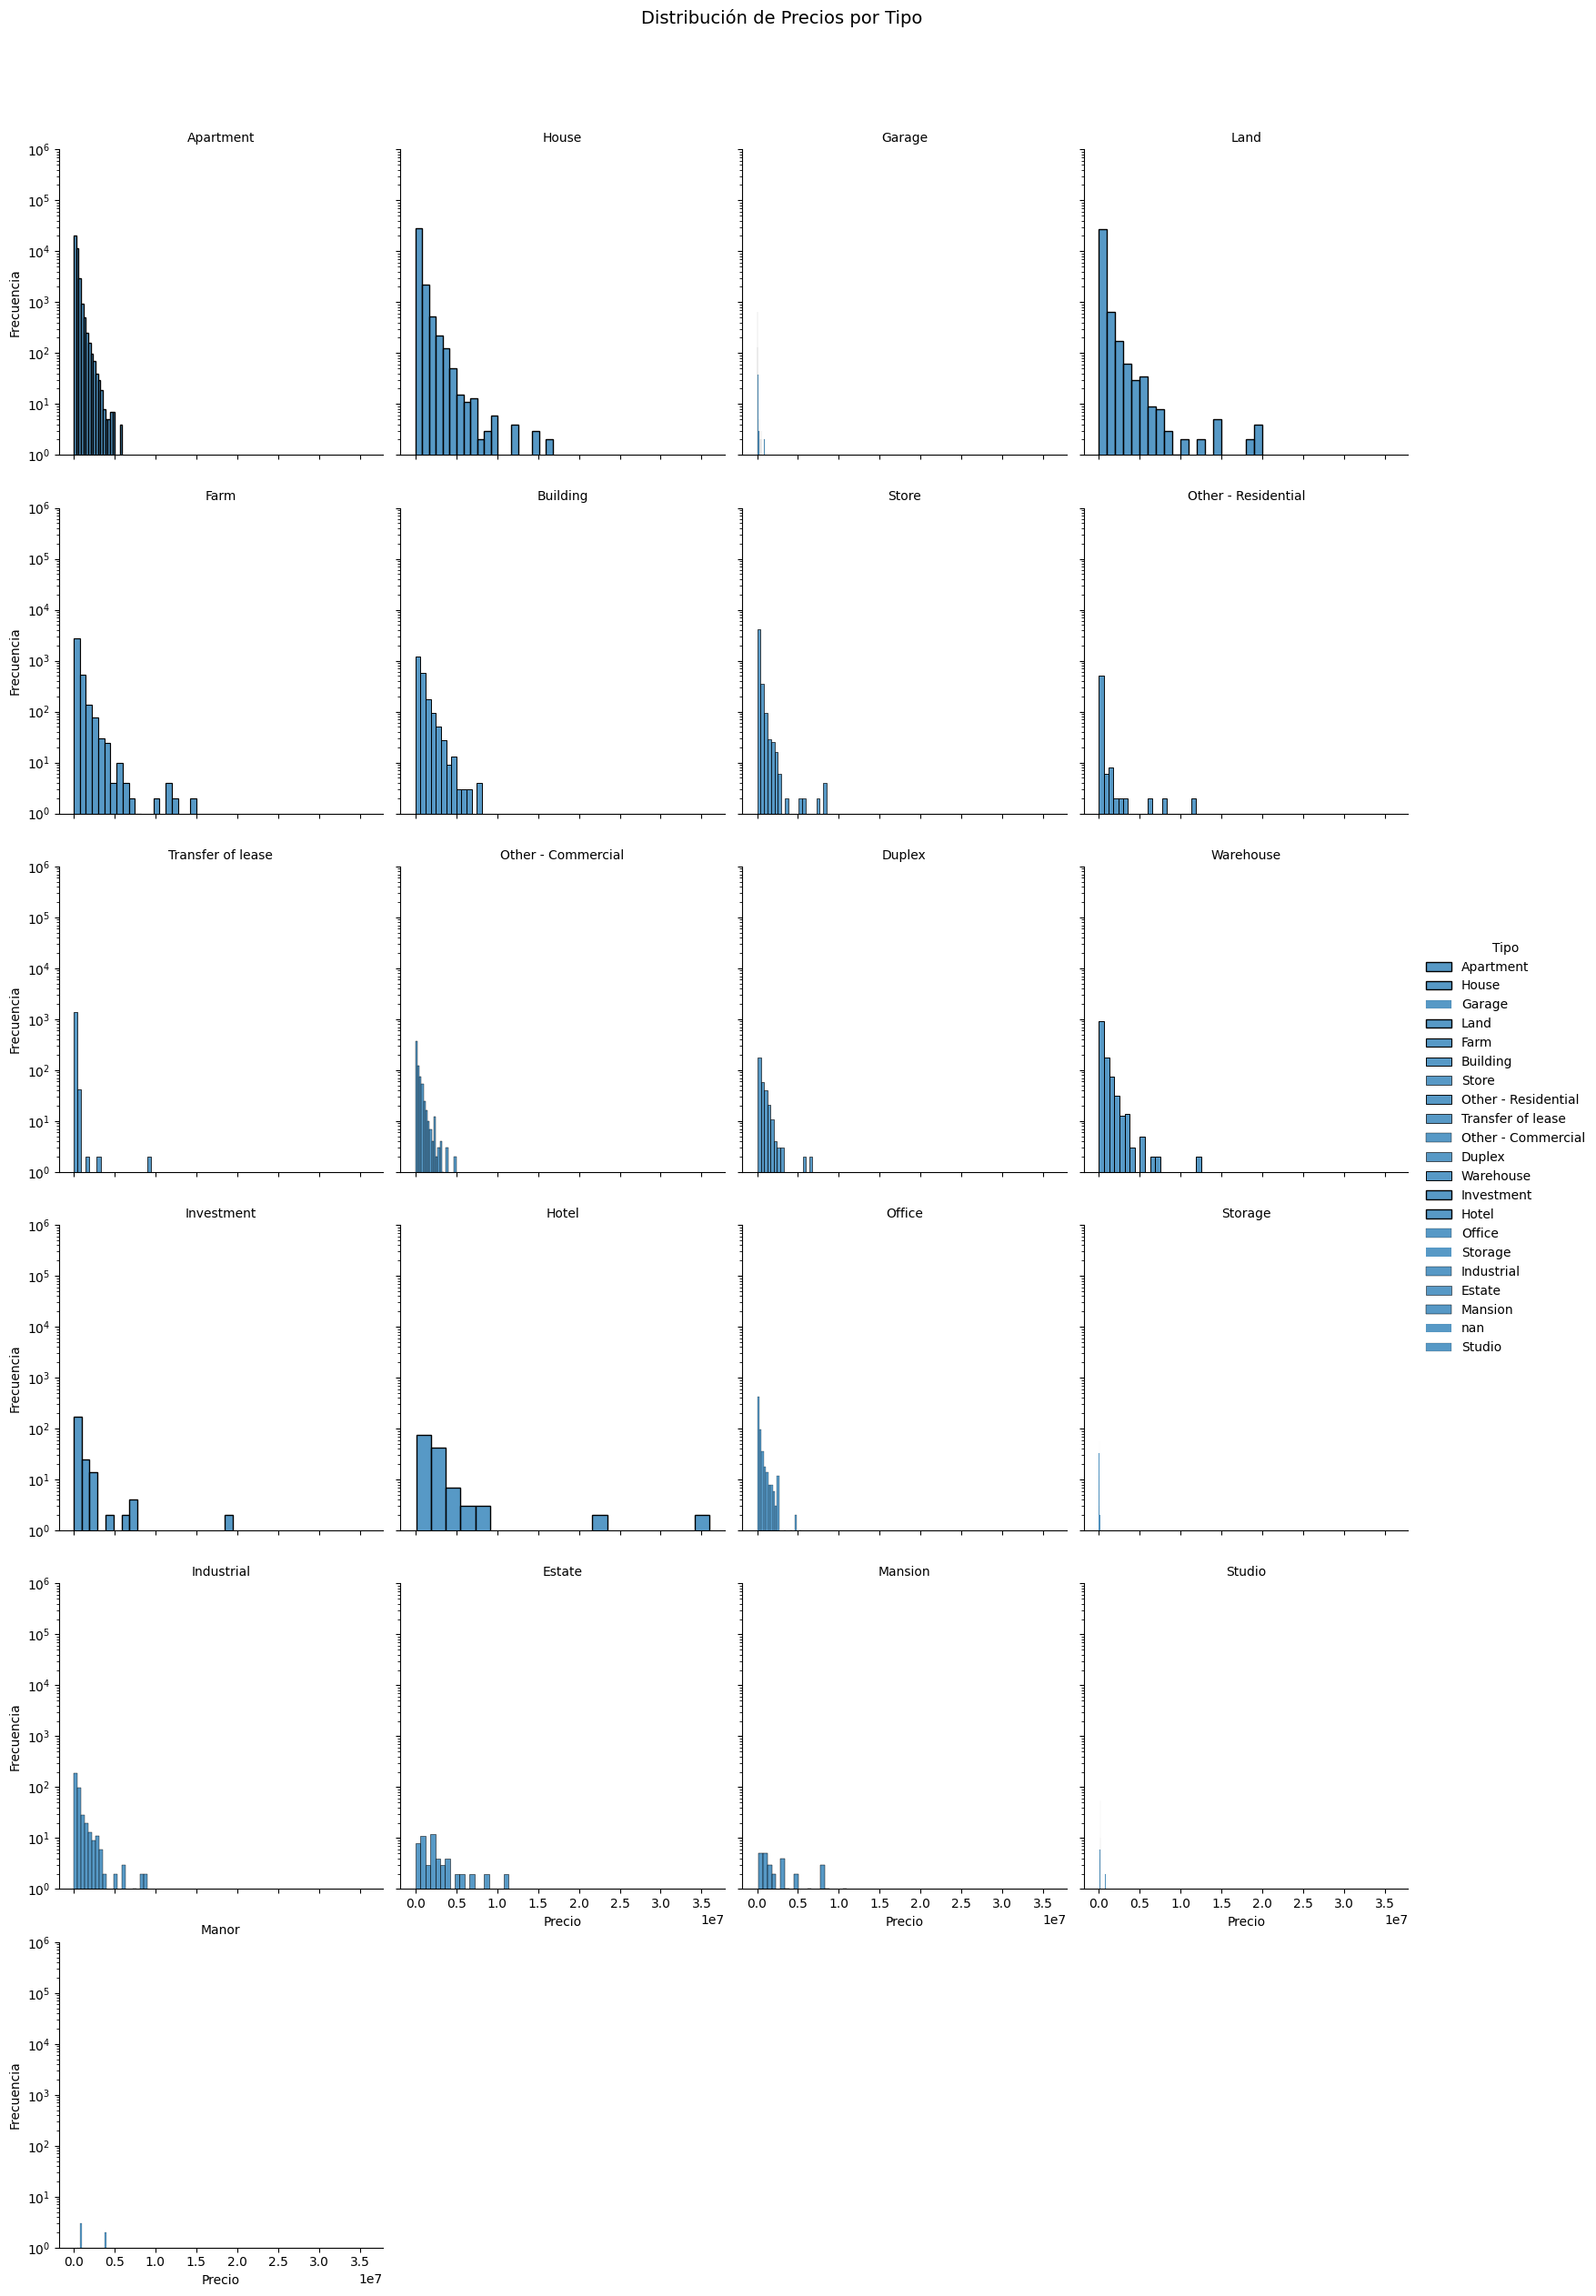

In [77]:
# Crear el gráfico de histograma por cada tipo
g = sns.FacetGrid(data, col="Type", col_wrap=4, height=4, palette="Set2")
g.map(sns.histplot, "Price", kde=False, bins=20)

# Personalizar las etiquetas y título
g.set_axis_labels("Precio", "Frecuencia")
g.set_titles("{col_name}")
g.fig.suptitle("Distribución de Precios por Tipo", fontsize=14, y=1.05)

# Establecer el límite superior del eje y en 2,000,000 para todos los gráficos
for ax in g.axes.flat:
    ax.set_ylim(0, 1000000)  # Establecer el límite superior en 2,000,000
    # Aplicar escala logarítmica si los datos son muy dispersos
    ax.set_yscale("log")

# Ajustar el tamaño de las leyendas
g.add_legend(title="Tipo", labels=data["Type"].unique())

# Mostrar el gráfico
plt.show()
